In [1]:
# KOLMINKERTAINEN EKSPONENTIAALINEN TASOITUSMALLI

# HUOMIOI SEKÄ TRENDIN ETTÄ KAUSIVAIHTELUN. 

# Kolminkertaista eksponentiaalista tasoitusta kutsutaan myös Holt-Winterin malliksi. Eksponentiaalisen tasoituksen 
# mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän 
# ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.

# Holt-Winterin malli huomioi sekä trendin että kausivaihtelun.
# Eksponentiaalinen tasoitus löytyy statsmodels.tsa-kirjastosta.

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df=pd.read_excel('Saapuneet puhelut kktasolla.xlsx')
df

,Kuukausi,Saapuneet
0,2017-12-01,3714
1,2018-01-01,6185
2,2018-02-01,5615
3,2018-03-01,5381
4,2018-04-01,7284
5,2018-05-01,20116
6,2018-06-01,13238
7,2018-07-01,7594
8,2018-08-01,7968
9,2018-09-01,31344


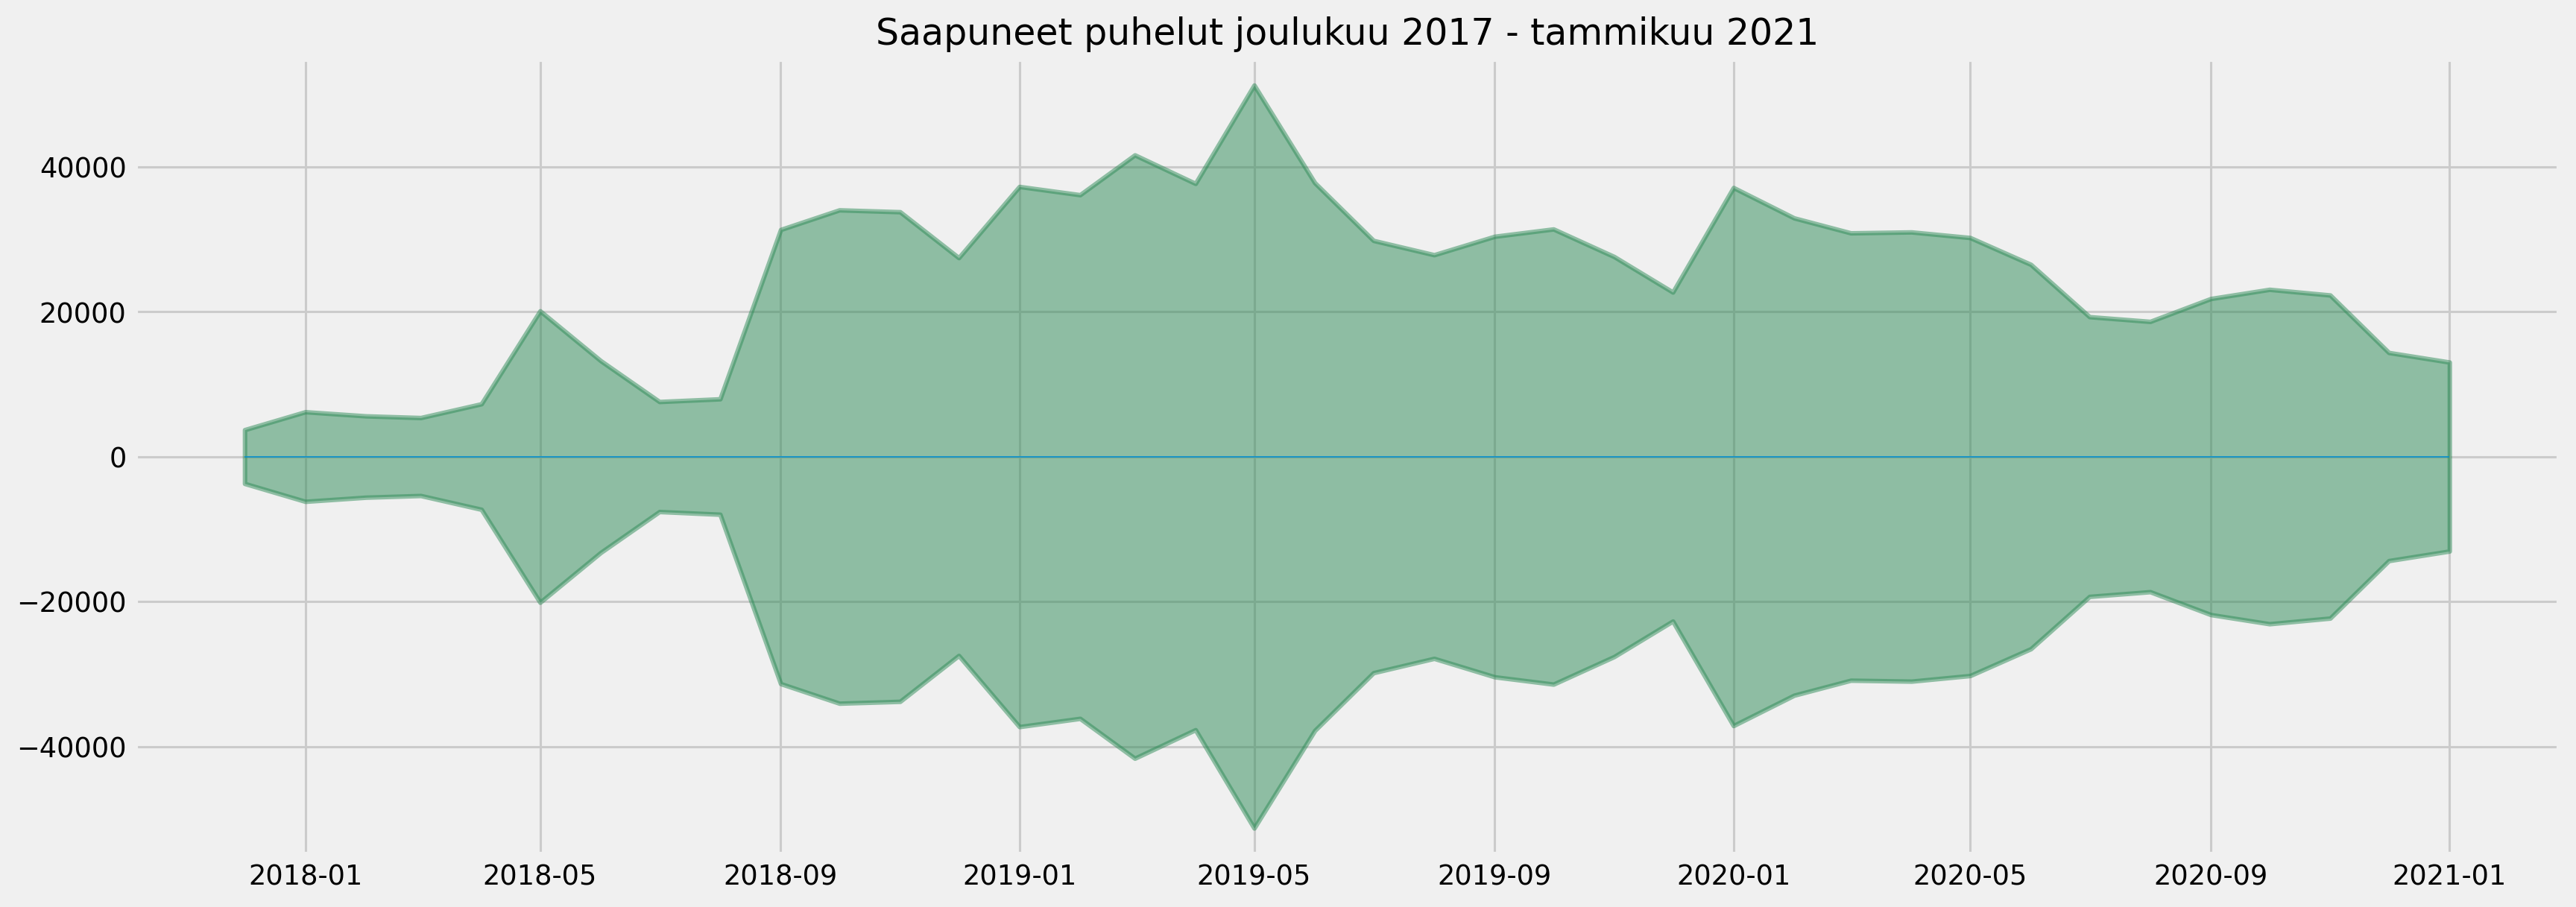

In [3]:
# Visualisointi
x = df['Kuukausi'].values
y1 = df['Saapuneet'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(17,6), dpi= 220)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-55000, 55000)
plt.title('Saapuneet puhelut joulukuu 2017 - tammikuu 2021', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Kuukausi), xmax=np.max(df.Kuukausi), linewidth=.5)
plt.show()

In [4]:
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df

,Saapuneet
Kuukausi,
2017-12-01,3714
2018-01-01,6185
2018-02-01,5615
2018-03-01,5381
2018-04-01,7284
2018-05-01,20116
2018-06-01,13238
2018-07-01,7594
2018-08-01,7968


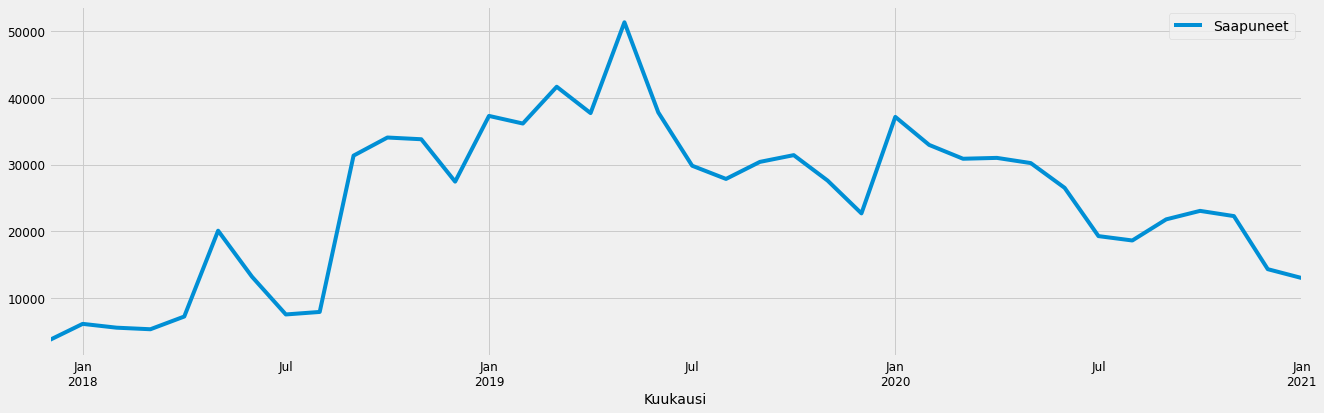

In [5]:
# Visualizing Time Series Data
df.plot(figsize=(20, 6))
plt.show()

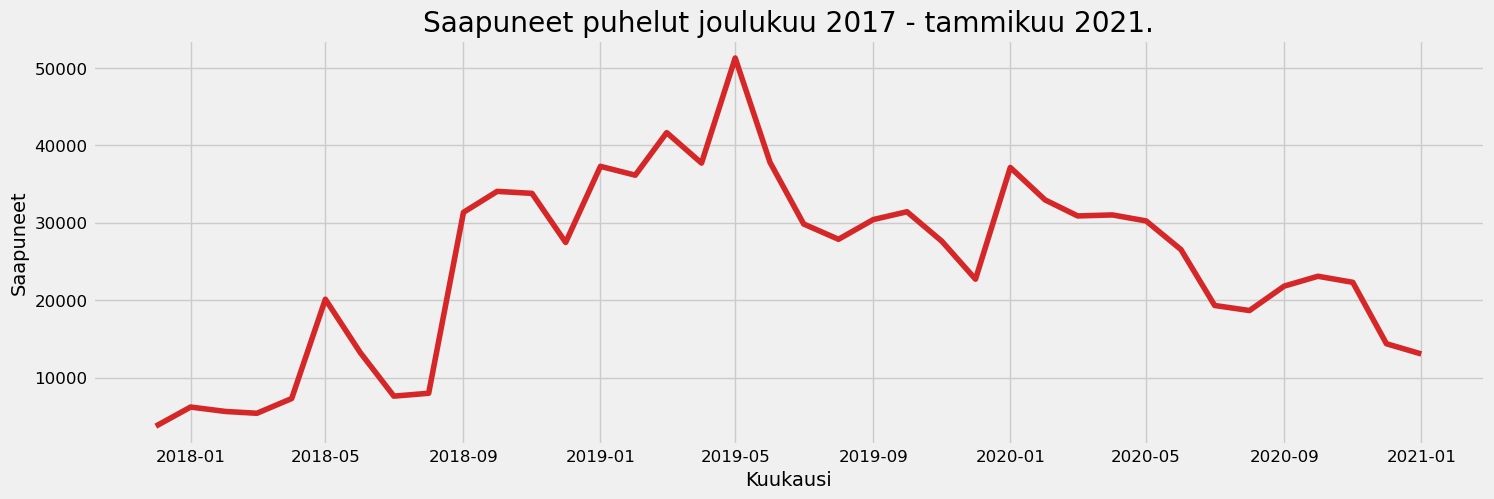

In [6]:
# Visualisoidaan vielä
import matplotlib.pyplot as plt

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Kuukausi', ylabel='Saapuneet', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.Saapuneet, title='Saapuneet puhelut joulukuu 2017 - tammikuu 2021.')

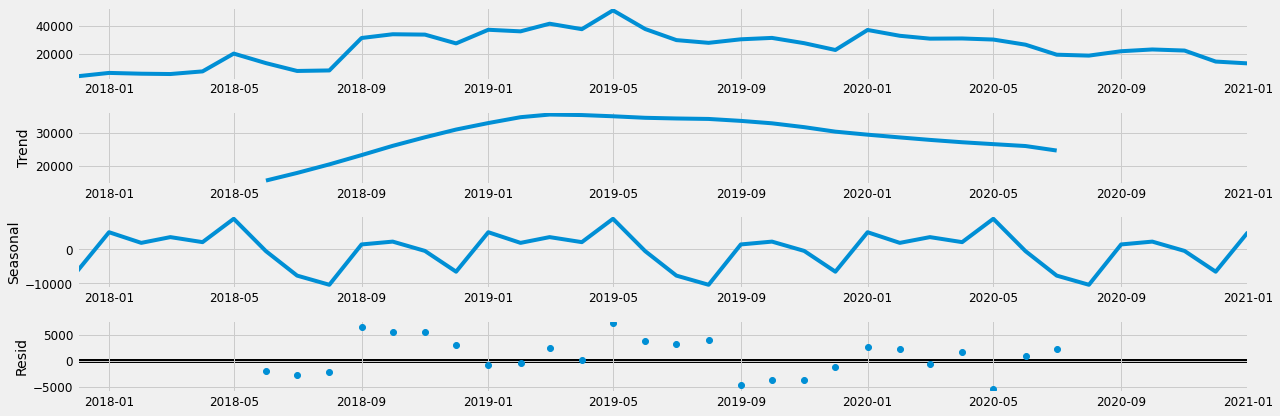

In [7]:
# Aikasarjan vaihtelua aiheuttavien komponenttien erottelu
# Observed=alkuperäinen aikasarja, Trend=trendi, Seasonal=kausivaihtelu,
# Residual=muu kuin trendiin ja kausivaihteluun liittyvä vaihtelu

# Tuloksena saan neljä kuviota:
# alkuperäinen aikasarja
# aikasarjasta erotettu trendi
# aikasarjan kausivaihtelu
# aikasarjan jäljelle jäänyt osa trendin ja kausivaihtelun poistamisen jälkeen.

# Visualizing Time Series Data
from pylab import rcParams
rcParams['figure.figsize'] = 18, 6
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

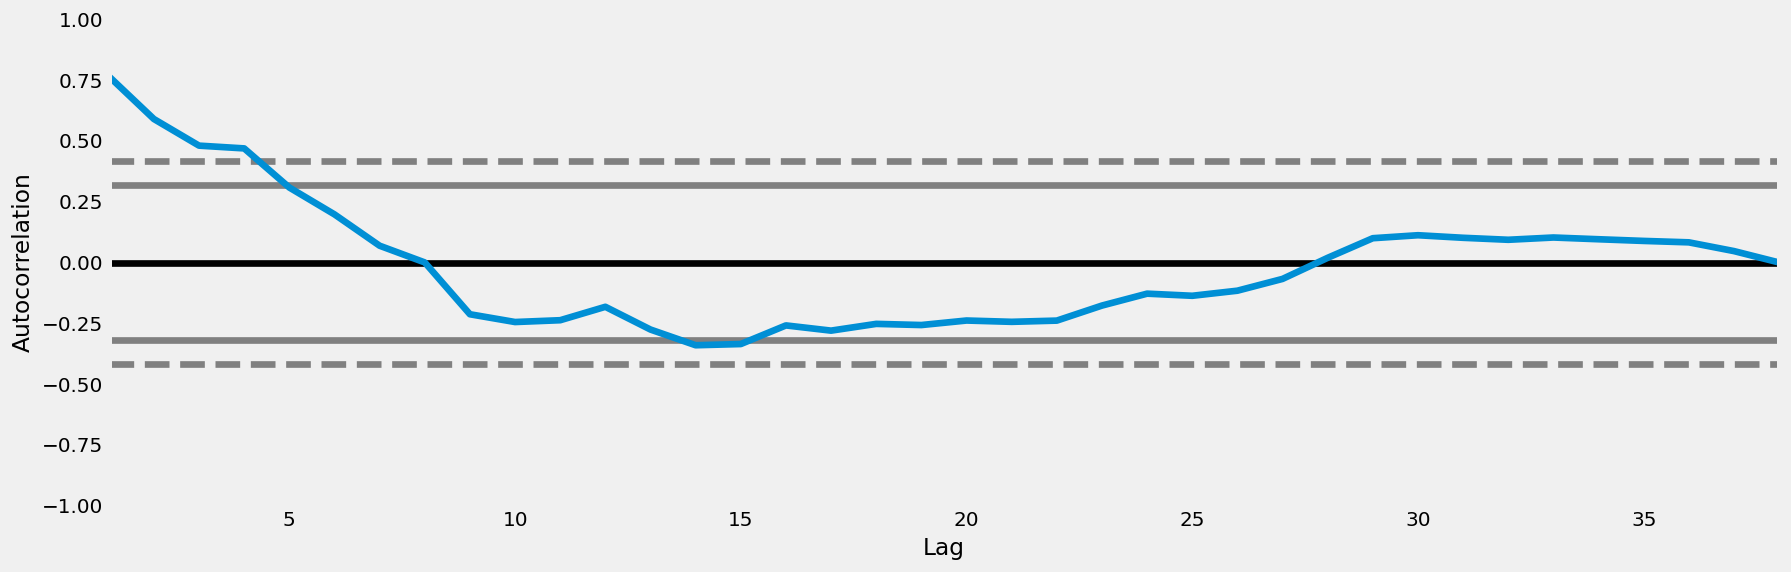

In [8]:
# Kausittaisuuden testaus
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(16,5), 'figure.dpi':120})
autocorrelation_plot(df.Saapuneet.tolist())

In [9]:
#Mallin sovitus
#Ennustemalli sovitetaan (fit()) dataan. Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi malli), joka sisältää monenlaista tietoa mallista.
#Trendiin (trend) käytän summamallia (add), jossa trendi on aikasarjaan lisättävä termi. Tämä on suositeltavin vaihtoehto.
#Kausivaihteluun (seasonal) käytän summamallia (add) tai tulomallia (mul). Tulomallissa kausivaihtelu ilmenee kertoimina. Tässä olen kokeillut myös summamallia, mutta tulomalli osoittautui paremmaksi.
#seasonal_periods-parametrille käytän arvoa 5, koska kausivaihtelu esiintyy viiden kuukauden jaksoissa.
#freq-parametrille käytän arvoa 'MS', koska kyseessä ovat kuukauden ensimmäiset päivät. Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
malli = ExponentialSmoothing(df['Saapuneet'], trend = 'add', seasonal = 'mul', 
                             seasonal_periods = 5, freq='MS').fit()

In [10]:
# malli-olion avulla saan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Saapuneet,Ennuste
Kuukausi,,
2017-12-01,3714,4004.112427
2018-01-01,6185,6978.006300
2018-02-01,5615,6515.343947
2018-03-01,5381,6354.695665
2018-04-01,7284,8698.265134
2018-05-01,20116,4430.455056
2018-06-01,13238,17144.745210
2018-07-01,7594,14685.742512
2018-08-01,7968,12030.424508


<AxesSubplot:xlabel='Kuukausi'>

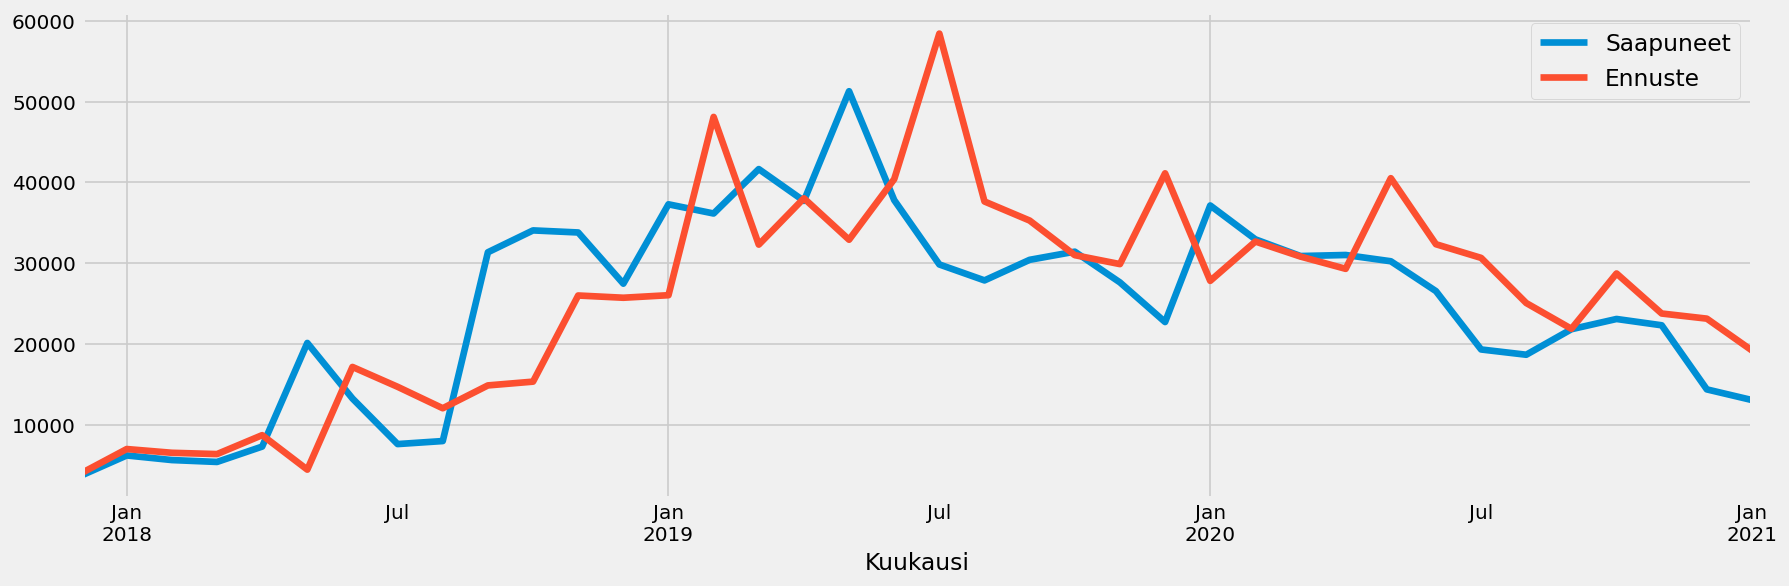

In [11]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [12]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Saapuneet,Ennuste,Ennustevirhe
Kuukausi,,,
2017-12-01,3714,4004.112427,-290.112427
2018-01-01,6185,6978.006300,-793.006300
2018-02-01,5615,6515.343947,-900.343947
2018-03-01,5381,6354.695665,-973.695665
2018-04-01,7284,8698.265134,-1414.265134
2018-05-01,20116,4430.455056,15685.544944
2018-06-01,13238,17144.745210,-3906.745210
2018-07-01,7594,14685.742512,-7091.742512
2018-08-01,7968,12030.424508,-4062.424508


Text(0, 0.5, 'Ennustevirhe')

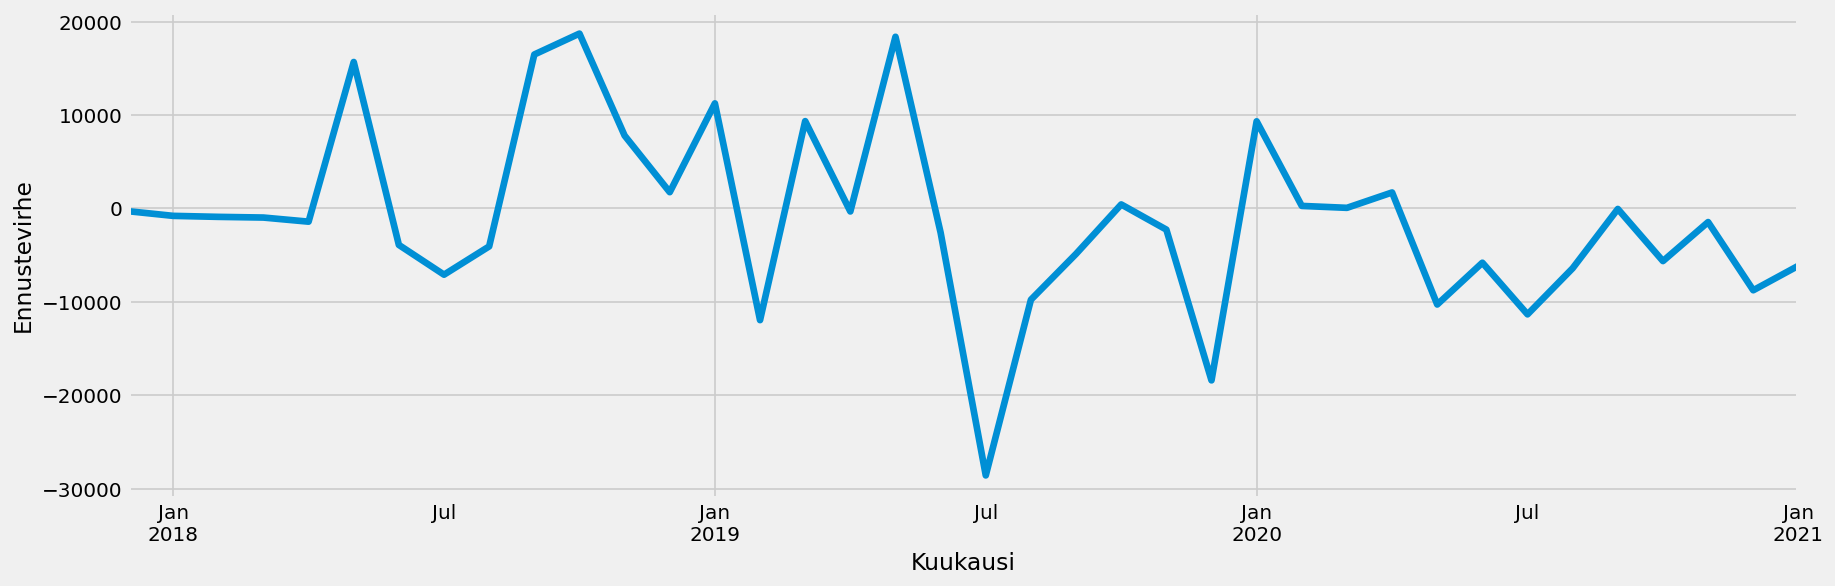

In [13]:
#Mallin tarkastelu
#Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
#ennustevirheiden aikasarjaa viivakaaviona
#ennusteiden ja toteutuneiden arvojen hajontakaaviota
#malliin liittyvää statistiikkaa, jonka saan summary()-toiminnolla.
#Huomaa erityisesti SSE (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

In [14]:
# Mallin hyvyyden arviointi, miten ennusteet menee keskimäärin pieleen?
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean squared error', mean_squared_error(df['Saapuneet'], df['Ennuste']))
print('Mean absolute error', mean_absolute_error(df['Saapuneet'], df['Ennuste']))

Mean squared error 93402283.06466463
Mean absolute error 6982.790364366


Text(0, 0.5, 'Toteutunut kysyntä')

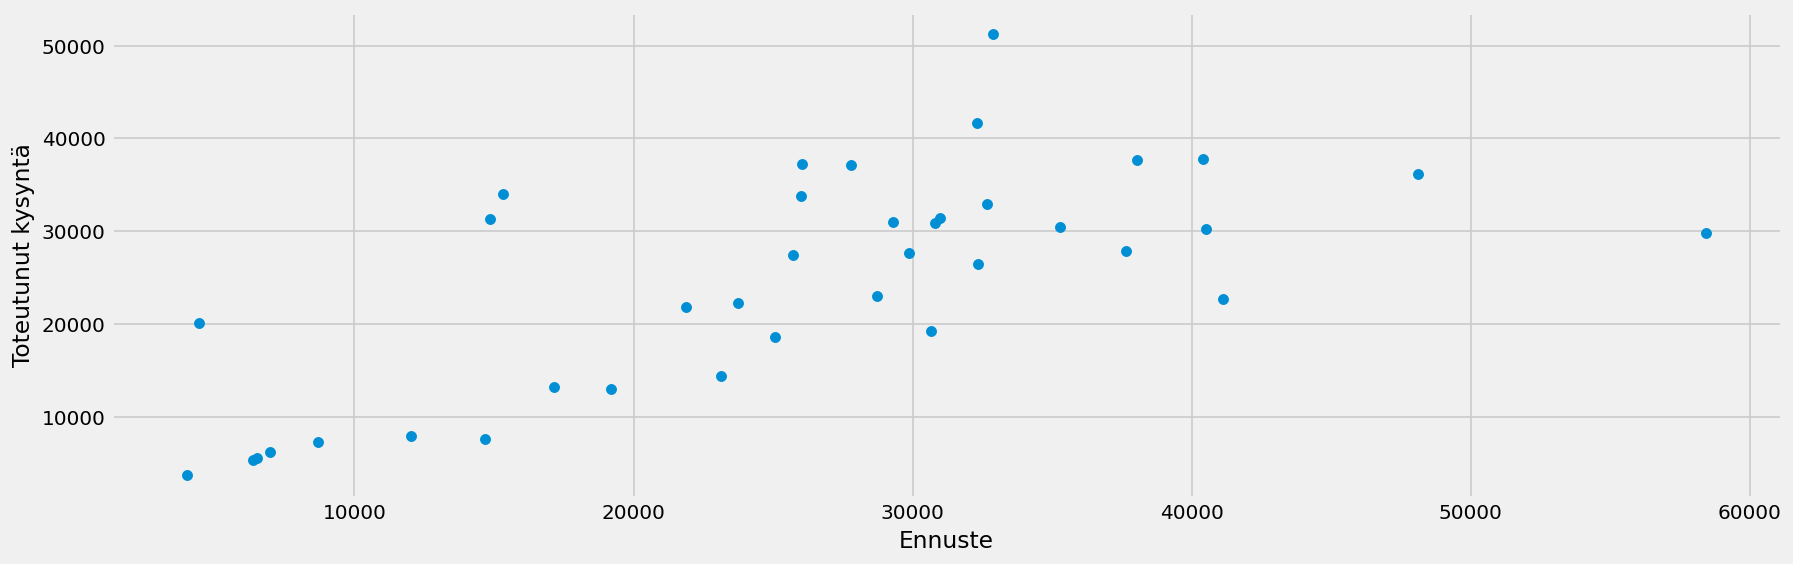

In [15]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Saapuneet'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [16]:
malli.summary()

Dep. Variable:,Saapuneet,No. Observations:,38
Model:,ExponentialSmoothing,SSE,3549286756.457
Optimized:,True,AIC,715.392
Trend:,Additive,BIC,730.130
Seasonal:,Multiplicative,AICC,725.546
Seasonal Periods:,5,Date:,"Thu, 11 Feb 2021"
Box-Cox:,False,Time:,18:27:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3585714,alpha,True
smoothing_trend,0.0001,beta,True


In [17]:
#Ennusteiden laskeminen
#Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
#Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.
#Ennustettavien ajankohtien lukumäärän voin määrittää periods-parametrilla.
#Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty freq-parametrin arvo.
#Lisätietoa freq-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
#Tarkistan viimeisen aikaleiman
df.tail()

,Saapuneet,Ennuste,Ennustevirhe
Kuukausi,,,
2020-09-01,21814,21867.529802,-53.529802
2020-10-01,23083,28718.977657,-5635.977657
2020-11-01,22302,23760.892311,-1458.892311
2020-12-01,14365,23125.655234,-8760.655234
2021-01-01,13044,19180.544644,-6136.544644


In [18]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2021-02-01', periods = 6, freq = 'MS')

# Ennusteet 6 kuukaudelle
ennusteet = malli.forecast(6)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2021-02-01,16881.904388
2021-03-01,21828.408748
2021-04-01,19800.895834
2021-05-01,19063.948134
2021-06-01,19105.988093
2021-07-01,18943.808822


<AxesSubplot:xlabel='Kuukausi'>

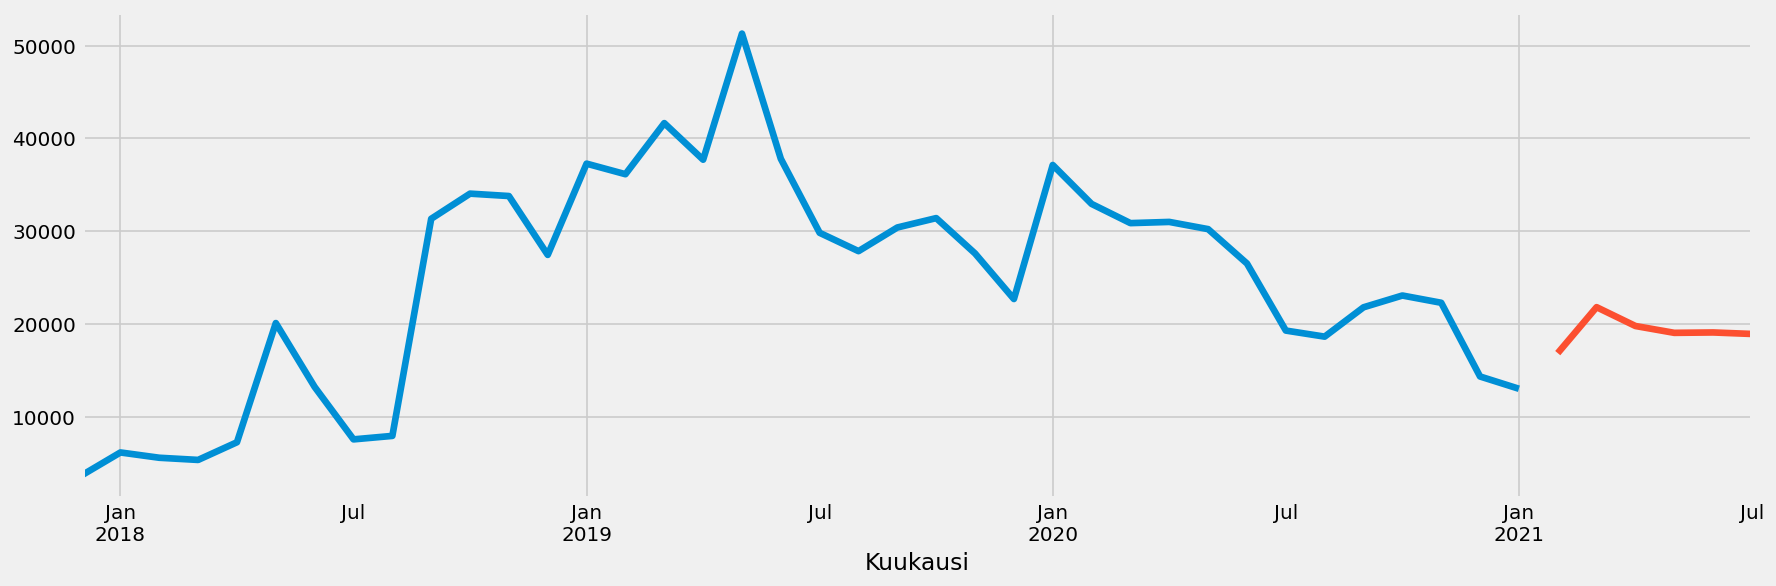

In [19]:
# Viivakaavio havainnoista
df['Saapuneet'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()

In [20]:
# Dataframe, jossa alkuperäinen aikasarja ja lasketut ennusteet
df1 = pd.concat([df, df_ennuste])
df1

,Saapuneet,Ennuste,Ennustevirhe
2017-12-01,3714.0,4004.112427,-290.112427
2018-01-01,6185.0,6978.006300,-793.006300
2018-02-01,5615.0,6515.343947,-900.343947
2018-03-01,5381.0,6354.695665,-973.695665
2018-04-01,7284.0,8698.265134,-1414.265134
2018-05-01,20116.0,4430.455056,15685.544944
2018-06-01,13238.0,17144.745210,-3906.745210
2018-07-01,7594.0,14685.742512,-7091.742512
2018-08-01,7968.0,12030.424508,-4062.424508
2018-09-01,31344.0,14856.834197,16487.165803


In [21]:
malli.params

{'smoothing_level': 0.3585714285714286,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.1115527950310559,
 'damping_trend': nan,
 'initial_level': 26669.5,
 'initial_trend': 2083.2400000000002,
 'initial_seasons': array([0.1392602 , 0.23191286, 0.21054013, 0.20176606, 0.27312098]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

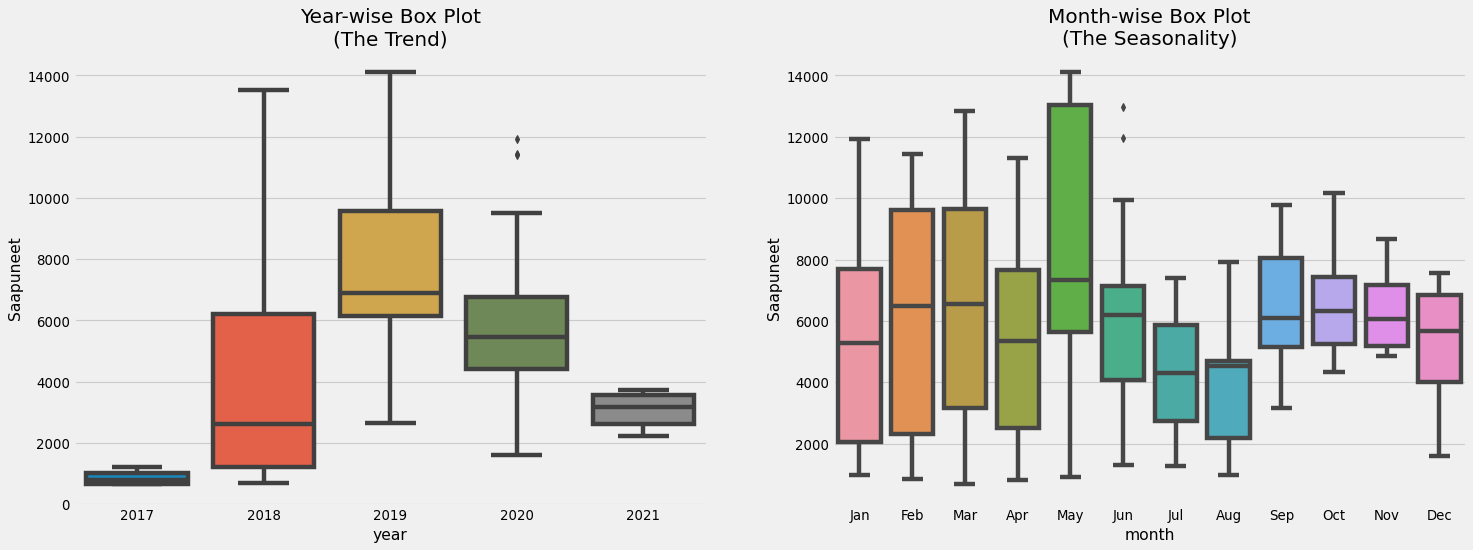

In [22]:
# Visuaalisaatio kausittaisuudesta

import seaborn as sns
# Boxplot kuukausi (kausittainen) ja vuosipohjainen trendi
# Import Data
df = pd.read_excel('Saapuneet puhelut viikkotasolla.xlsx', index_col='Date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.Date]
df['month'] = [d.strftime('%b') for d in df.Date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Saapuneet', data=df, ax=axes[0])
sns.boxplot(x='month', y='Saapuneet', data=df.loc[~df.year.isin([2017, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()